In [72]:
# %load LOOCV.py
from matplotlib import pyplot as plt
import lasio
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import openpyxl
from sklearn.svm import SVR
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [127]:
from DataSet import dataset_lab
import DataSet
import imp
imp.reload(DataSet)
from DataSet import dataset_lab
from model import one_cnn_model, three_cnn_model, bp_model, LinearRegression_model
import model
imp.reload(model)
from Normalization import Normalization, Anti_Normalization, Normalization_lab, Anti_Normalization_lab
import Normalization
imp.reload(Normalization)
from Normalization import Normalization, Anti_Normalization, Normalization_lab, Anti_Normalization_lab

In [111]:
# 读取初始化相关数据
b = 6

In [128]:
data = dataset_lab(b)
print(data.shape)

(201, 4)


In [129]:
model = LinearRegression()
RHOB = data[:, 2].reshape(-1, 1)
GAS = data[:, 3].reshape(-1, 1)
model.fit(RHOB, GAS)
score = model.score(RHOB, GAS)
ev = model.coef_  # 回归系数
inter = model.intercept_
yhat = model.predict(RHOB)
yhat = yhat.reshape(yhat.shape[0], 1)
#     print("yhat:", yhat)
#     print("yhat_array[test_index][0]:", yhat_array[test_index][0])
print("ev:", ev)
print("inter:", inter)

ev: [[-10.56499268]]
inter: [29.40776038]


In [ ]:
filtered_Aim = []
other_Aim = []
filtered_Para = []
other_Para = []
Aim = data[:, 3]
filtered_yhat = []
b = 1
for i in range(Aim.shape[0]):
    if(-b < (Aim[i] - yhat[i]) < b):
        filtered_Aim.append(Aim[i])
        filtered_Para.append(Para_VVR[i])
        filtered_yhat.append(filtered_yhat)
    else:
        other_Aim.append(Aim[i])
        other_Para.append(Para_VVR[i])       
filtered_Aim = np.array(filtered_Aim).reshape(-1, 1)
filtered_Para = np.array(filtered_Para)
filtered_data = np.hstack((filtered_Para, filtered_Aim))
other_Aim = np.array(other_Aim).reshape(-1, 1)
other_Para = np.array(other_Para)
other_data = np.hstack((other_Para, other_Aim))
filtered_yhat = np.array(filtered_yhat).reshape(-1, 1)

a = yhat
a = a.reshape(-1, 1)
Aim = Aim.reshape(-1, 1)
NL_input_data = NL_input_data.reshape(-1, 3)
print("a_Aim:", np.hstack((a, Aim)))
print('mse: ', mean_squared_error(Aim, a))
print("Para_VVR[:, 2].shape:", Para_VVR[:, 2].shape)
Para_VVR[:, 2] = Para_VVR[:, 2].reshape(1, -1)
#print('平均相对误差: ', np.average(np.abs(Aim - yhat_array) / a, axis=0))
print('R2: ', r2_score(a, Aim))

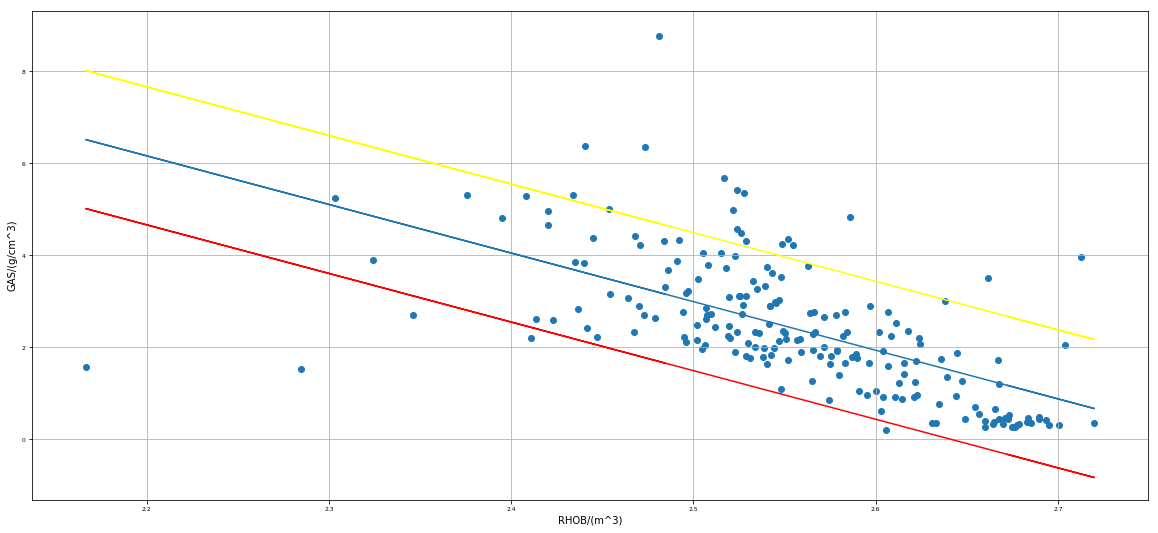

In [132]:
fig_2 = plt.figure(figsize=(20, 9))  # 作图画布大小(每循环一次，就会建立新的画布）
# for f in range(3):
#     ax = fig_2.add_subplot(1, 4, f + 1)  # 图布一行len(a)列，画在第f+1块
#     ax.plot(Para_VVR[train_data_length:, f], depth)
#     ax.set_xlabel(df_Para.keys()[f])
#     ax.xaxis.tick_top()
#     ax.invert_yaxis()
#     plt.tick_params(labelsize=6)
# ax = fig_2.add_subplot(1, 1, 1)
# ax.plot(Para_VVR[:, 2], a)
# ax.plot(a, 'o-', color="red", linewidth=2, label='predict_value')
# ax.plot(NL_input_data[:, 0],  'o-', color = 'blue', linewidth=2, label='DTS')
# ax.plot(NL_input_data[:, 1], 'o-',color = 'purple', linewidth=2, label='DT')
plt.plot(filtered_data[:, 2], filtered_yhat -1.5, color = 'red', label = 'predict')
plt.plot(filtered_data[:, 2], filtered_yhat + 1.5, color = 'yellow', label = 'predict')
plt.plot(filtered_data[:, 2], filtered_yhat, label = 'predict')
# plt.xticks(np.arange(1, 38 , 1))
plt.scatter(filtered_data[:, 2], filtered_data[:, 3])
plt.scatter(other_data[:, 2], other_data[:, 3])
plt.xlabel("RHOB/(m^3)")
plt.ylabel("GAS/(g/cm^3)")
# ax.set_xlabel(las_23.keys()[b])
plt.tick_params(labelsize=6)
#     # plt.savefig(r"D:\software\pycharm\PyCharm 2019.3.3\projects\predict_GASV\结果\onewey\图片\两口井3to5\onecon/" + name + ".png")
#     plt.savefig("lab_bp_loocv_carve_predict")
plt.grid() 
plt.show()